In [1]:
# utility file to get some stats on the data

import glob
import json
import matplotlib.pyplot as plt

data_dir = "../webapp/data/"

language_codes = [f.split("/")[-1] for f in glob.glob(f"{data_dir}/languages/*")]
print("Total languages:", len(language_codes))

# load the 5words.txt file in each language and count the number of words
for code in language_codes:
    with open(f"{data_dir}languages/{code}/{code}_5words.txt") as f:
        words = f.read().split("\n")
        print(f"{code}: {len(words)} words")



Total languages: 59
ie: 2147 words
ko: 8922 words
ne: 2197 words
sl: 11731 words
nl: 7441 words
lb: 1752 words
hu: 6047 words
fr: 4482 words
oc: 4204 words
en: 2310 words
ia: 2476 words
mk: 5998 words
ga: 5082 words
tr: 9224 words
is: 8285 words
it: 2783 words
ru: 4688 words
pt: 9016 words
es: 3602 words
lv: 2775 words
br: 7143 words
ca: 9079 words
hr: 3591 words
et: 9459 words
ltg: 388 words
sr: 17968 words
pl: 10184 words
he: 64540 words
vi: 739 words
fa: 11253 words
eu: 7520 words
uk: 9589 words
ro: 8618 words
fur: 3569 words
fy: 6095 words
ar: 13883 words
tk: 5814 words
mn: 4830 words
gd: 4660 words
sk: 10444 words
la: 5802 words
tlh: 270 words
nds: 1001 words
bg: 4953 words
hy: 3848 words
nn: 10523 words
cs: 7544 words
eo: 2449 words
hyw: 3748 words
el: 10209 words
da: 9516 words
rw: 21 words
fo: 6448 words
sv: 5968 words
nb: 7471 words
de: 2277 words
gl: 3269 words
lt: 2004 words
ka: 8827 words


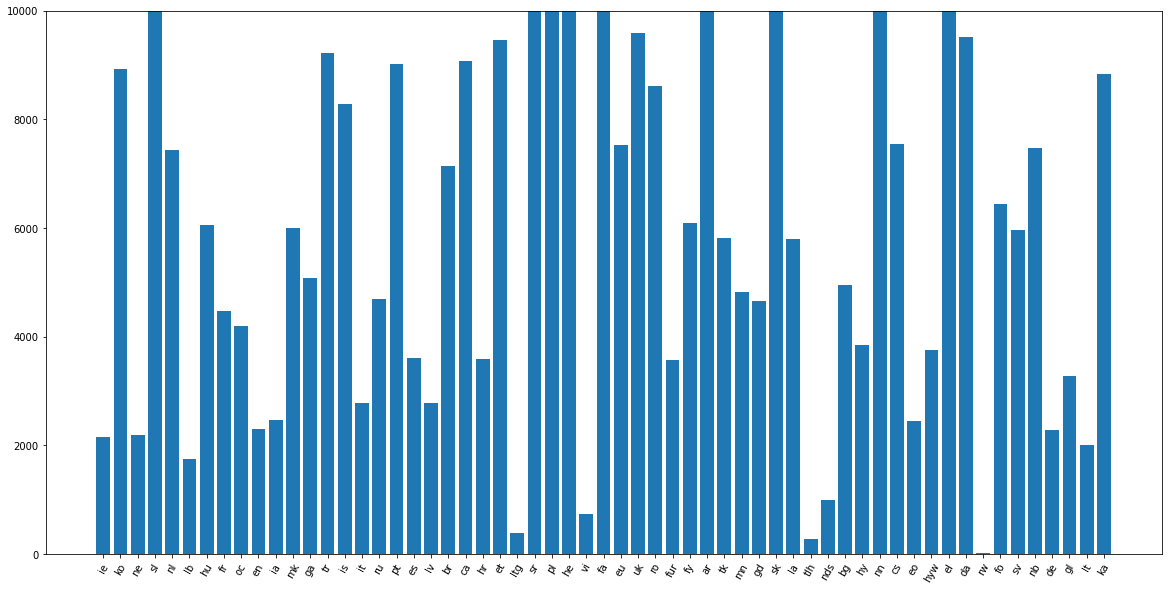

In [2]:
# plot the number of words for each language
n_words = {}
for code in language_codes:
    with open(f"{data_dir}languages/{code}/{code}_5words.txt") as f:
        words = f.read().split("\n")
        n_words[code] = len(words)

# plot
plt.figure(figsize=(20, 10))
plt.ylim(0, 10000)
plt.bar(range(len(n_words)), list(n_words.values()))
plt.xticks(range(len(n_words)), list(n_words.keys()), rotation=60)
plt.savefig("out/n_words.png")
plt.show()

In [4]:
# print a status list for the README

with open(f"{data_dir}/languages.json", "r") as f:
    languages_data = json.load(f)

def load_supplemental_words(lang):
    try:
        with open(f"{data_dir}languages/{lang}/{lang}_5words_supplement.txt", "r") as f:
            supplemental_words = [line.strip() for line in f]
    except FileNotFoundError:
        supplemental_words = []
    return supplemental_words

with open("out/status_list.txt", "w", encoding="utf-8") as f:
    for code in language_codes:
        with open(f"{data_dir}languages/{code}/{code}_5words.txt") as g:
            words = g.read().split("\n")
            words_supplement = load_supplemental_words(code)
            status_emoji = "🟥"
            if len(words) + len(words_supplement) > 500:
                status_emoji = "🟧"
            if len(words) + len(words_supplement) > 1000:
                status_emoji = "🟨"
            # if we've added words to the supplemental list, then we probably have a pretty good
            # "good words" + "possible" words list, thus green status emoji
            if len(words_supplement) > 2:
                status_emoji = "🟩"
            language_name = languages_data[code]['language_name']
            f.write(f"  - {language_name[:]} ({code}): {' '*(25-(len(language_name)+len(code)))} {status_emoji} ({len(words) + len(words_supplement)} words)\n")